In [1]:
## Importing Libraries
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
import torch
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential,layers, losses, optimizers
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.layers import GaussianNoise
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score

In [2]:
## Data loading
df = pd.read_csv("all_group_train_normalized.csv")

In [5]:
### Benign data loading
df1 = pd.read_csv("Benign Data.csv")

In [6]:
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]

In [7]:
benign_data = df1.iloc[:,0:200]

In [8]:
benign_data

,ip_header_byte_2,ip_header_byte_3,ip_header_byte_4,ip_header_byte_5,ip_header_byte_6,ip_header_byte_7,ip_header_byte_8,ip_header_byte_10,ip_header_byte_11,tcp_header_byte_4,...,tcp_segment_data_byte_125,tcp_segment_data_byte_126,tcp_segment_data_byte_127,tcp_segment_data_byte_128,tcp_segment_data_byte_129,tcp_segment_data_byte_130,tcp_segment_data_byte_131,tcp_segment_data_byte_132,tcp_segment_data_byte_133,tcp_segment_data_byte_134
0,0.0,0.266667,0.098039,0.756863,0.25098,0.0,0.501961,0.015686,0.627451,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.203922,0.400000,0.462745,0.25098,0.0,0.501961,0.690196,0.741176,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.156863,0.294118,0.517647,0.25098,0.0,0.501961,0.823529,0.972549,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.156863,0.321569,0.254902,0.25098,0.0,0.501961,0.800000,0.231373,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.156863,0.035294,0.580392,0.25098,0.0,0.501961,0.078431,0.913725,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142056,0.0,0.156863,0.074510,0.070588,0.25098,0.0,0.501961,0.043137,0.419608,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142057,0.0,0.156863,0.200000,0.533333,0.25098,0.0,0.501961,0.917647,0.956863,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142058,0.0,0.156863,0.450980,0.733333,0.25098,0.0,0.501961,0.666667,0.756863,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142059,0.0,0.156863,0.117647,0.439216,0.25098,0.0,0.501961,0.000000,0.050980,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
normal_data, attack_data = df[df['Label_binary']=='Benign'], df[df['Label_binary']=='Malicious']

In [10]:
normal_data_200 = normal_data.iloc[:,0:200]
normal_data_200.shape

(53432, 200)

In [11]:
normal_data_200_with_labels = pd.concat([normal_data_200, normal_data['Label_binary']], axis=1)
normal_data_200_with_labels

,ip_header_byte_2,ip_header_byte_3,ip_header_byte_4,ip_header_byte_5,ip_header_byte_6,ip_header_byte_7,ip_header_byte_8,ip_header_byte_10,ip_header_byte_11,tcp_header_byte_4,...,tcp_segment_data_byte_126,tcp_segment_data_byte_127,tcp_segment_data_byte_128,tcp_segment_data_byte_129,tcp_segment_data_byte_130,tcp_segment_data_byte_131,tcp_segment_data_byte_132,tcp_segment_data_byte_133,tcp_segment_data_byte_134,Label_binary
0,0.0,0.156863,0.141176,0.219608,0.25098,0.0,0.501961,0.980392,0.266667,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,0.0,0.156863,0.411765,0.819608,0.25098,0.0,0.501961,0.670588,0.149020,0.435294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,0.0,0.156863,0.192157,0.996078,0.25098,0.0,0.501961,0.925490,0.494118,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,0.0,0.156863,0.305882,0.768627,0.25098,0.0,0.501961,0.811765,0.721569,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
6,0.0,0.203922,0.215686,0.725490,0.25098,0.0,0.501961,0.901961,0.713725,0.643137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106857,0.0,0.156863,0.098039,0.776471,0.25098,0.0,0.501961,0.015686,0.717647,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
106859,0.0,0.156863,0.235294,0.235294,0.25098,0.0,0.501961,0.886275,0.250980,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
106860,0.0,0.156863,0.227451,0.521569,0.25098,0.0,0.501961,0.890196,0.964706,0.643137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
106862,0.0,0.203922,0.447059,0.176471,0.25098,0.0,0.250980,0.286275,0.501961,0.631373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [12]:
attack_data_200 = attack_data.iloc[:,0:200]

In [14]:
X_train = benign_data

In [15]:
X_test_normal = normal_data_200.iloc[0:50000,:]
X_test_normal

,ip_header_byte_2,ip_header_byte_3,ip_header_byte_4,ip_header_byte_5,ip_header_byte_6,ip_header_byte_7,ip_header_byte_8,ip_header_byte_10,ip_header_byte_11,tcp_header_byte_4,...,tcp_segment_data_byte_125,tcp_segment_data_byte_126,tcp_segment_data_byte_127,tcp_segment_data_byte_128,tcp_segment_data_byte_129,tcp_segment_data_byte_130,tcp_segment_data_byte_131,tcp_segment_data_byte_132,tcp_segment_data_byte_133,tcp_segment_data_byte_134
0,0.0,0.156863,0.141176,0.219608,0.25098,0.0,0.501961,0.980392,0.266667,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.156863,0.411765,0.819608,0.25098,0.0,0.501961,0.670588,0.149020,0.435294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.156863,0.192157,0.996078,0.25098,0.0,0.501961,0.925490,0.494118,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.156863,0.305882,0.768627,0.25098,0.0,0.501961,0.811765,0.721569,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.203922,0.215686,0.725490,0.25098,0.0,0.501961,0.901961,0.713725,0.643137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100025,0.0,0.156863,0.466667,0.772549,0.25098,0.0,0.501961,0.650980,0.717647,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100031,0.0,0.156863,0.482353,0.803922,0.25098,0.0,0.501961,0.635294,0.686275,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100032,0.0,0.156863,0.180392,0.133333,0.25098,0.0,0.501961,0.941176,0.352941,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100034,0.0,0.156863,0.113725,0.027451,0.25098,0.0,0.501961,0.003922,0.462745,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
## The Variationa autoencoder architecture
tf.random.set_seed(2)
input_dims = 200
# Define the dimensions of the latent variable layer
latent_dim = 10

# Define the encoder network
encoder = Sequential([
    Dense(input_dims, input_shape=(input_dims,), activation='relu'),
    Dense(150, activation='relu'),
    Dense(input_dims // 2, activation='relu'),
    Dense(input_dims // 4, activation='relu'),
    Dense(latent_dim*2),
])

# Define the decoder network
decoder = Sequential([
    Dense(input_dims // 4, input_shape=(latent_dim,), activation='relu'),
    Dense(input_dims // 2, activation='relu'),
    Dense(150, activation='relu'),
    Dense(input_dims, activation='relu'),
])

# Define the sampling layer
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch_size = tf.shape(z_mean)[0]
        z_dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch_size, z_dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Define the VAE model
inputs = layers.Input(shape=(input_dims,))
z_mean, z_log_var = tf.split(encoder(inputs), num_or_size_splits=2, axis=1)
z = Sampling()([z_mean, z_log_var])
outputs = decoder(z)
model_VAE = tf.keras.Model(inputs, outputs)

# Define the loss function
beta = 0.0001
reconstruction_loss = tf.keras.losses.mae(inputs, outputs)
# The reconstruction loss is multiplied by the number of input dimensions to 
# ensure that it is not dominated by the KL divergence term.
# PAge 11 in the VAE paper https://arxiv.org/pdf/1312.6114.pdf

reconstruction_loss *= input_dims
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_mean(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = tf.reduce_mean(reconstruction_loss + beta * kl_loss)

# Compile the VAE model
model_VAE.add_loss(vae_loss)
model_VAE.compile(optimizer='adam')

# Train the VAE model
model_VAE.fit(X_train, batch_size=512, epochs=500, shuffle=True)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/500
278/278 [==============================] - 2s 8ms/step - loss: 4.5074
Epoch 2/500
278/278 [==============================] - 2s 8ms/step - loss: 3.2265
Epoch 3/500
278/278 [==============================] - 3s 9ms/step - loss: 2.8132
Epoch 4/500
278/278 [==============================] - 3s 9ms/step - loss: 2.4602
Epoch 5/500
278/278 [==============================] - 3s 10ms/step - lo

278/278 [==============================] - 2s 9ms/step - loss: 1.1707
Epoch 186/500
278/278 [==============================] - 2s 9ms/step - loss: 1.1740
Epoch 187/500
278/278 [==============================] - 3s 9ms/step - loss: 1.1730
Epoch 188/500
278/278 [==============================] - 3s 10ms/step - loss: 1.1592
Epoch 189/500
278/278 [==============================] - 3s 10ms/step - loss: 1.1626
Epoch 190/500
278/278 [==============================] - 2s 9ms/step - loss: 1.1571
Epoch 191/500
278/278 [==============================] - 3s 9ms/step - loss: 1.1595
Epoch 192/500
278/278 [==============================] - 2s 9ms/step - loss: 1.1559
Epoch 193/500
278/278 [==============================] - 2s 9ms/step - loss: 1.1529A: 
Epoch 194/500
278/278 [==============================] - 2s 9ms/step - loss: 1.1625
Epoch 195/500
278/278 [==============================] - 3s 9ms/step - loss: 1.1584
Epoch 196/500
278/278 [==============================] - 3s 9ms/step - loss: 1.1651
E

278/278 [==============================] - 3s 11ms/step - loss: 1.0772
Epoch 378/500
278/278 [==============================] - 3s 11ms/step - loss: 1.0769
Epoch 379/500
278/278 [==============================] - 3s 10ms/step - loss: 1.0809
Epoch 380/500
278/278 [==============================] - 3s 11ms/step - loss: 1.0843
Epoch 381/500
278/278 [==============================] - 3s 10ms/step - loss: 1.0751
Epoch 382/500
278/278 [==============================] - 3s 9ms/step - loss: 1.0806
Epoch 383/500
278/278 [==============================] - 3s 9ms/step - loss: 1.0723
Epoch 384/500
278/278 [==============================] - 3s 9ms/step - loss: 1.0745
Epoch 385/500
278/278 [==============================] - 3s 9ms/step - loss: 1.0766
Epoch 386/500
278/278 [==============================] - 3s 9ms/step - loss: 1.0721
Epoch 387/500
278/278 [==============================] - 3s 9ms/step - loss: 1.0737
Epoch 388/500
278/278 [==============================] - 2s 9ms/step - loss: 1.0736
E

278/278 [==============================] - 2s 9ms/step - loss: 1.0643
Epoch 475/500
278/278 [==============================] - 2s 8ms/step - loss: 1.0662
Epoch 476/500
278/278 [==============================] - 2s 8ms/step - loss: 1.0661
Epoch 477/500
278/278 [==============================] - 2s 8ms/step - loss: 1.0626
Epoch 478/500
278/278 [==============================] - 2s 9ms/step - loss: 1.0576
Epoch 479/500
278/278 [==============================] - 2s 9ms/step - loss: 1.0628
Epoch 480/500
278/278 [==============================] - 2s 8ms/step - loss: 1.0669
Epoch 481/500
278/278 [==============================] - 3s 9ms/step - loss: 1.0566
Epoch 482/500
278/278 [==============================] - 3s 9ms/step - loss: 1.0630
Epoch 483/500
278/278 [==============================] - 2s 9ms/step - loss: 1.0662
Epoch 484/500
278/278 [==============================] - 3s 9ms/step - loss: 1.0657
Epoch 485/500
278/278 [==============================] - 2s 9ms/step - loss: 1.0566
Epoch 

In [48]:
## Subsetting different attacks Different 
infiltration_attack = df[df['Label'] == 'Infiltration'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(infiltration_attack.shape)
portscan_attack = df[df['Label'] == 'Port Scan'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(portscan_attack.shape)
ddos_attack = df[df['Label'] == 'DDoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(ddos_attack.shape)
bruteforce_attack = df[df['Label'] == 'Brute Force'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(bruteforce_attack.shape)
dos_attack = df[df['Label'] == 'DoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(dos_attack.shape)
web_attack = df[df['Label'] == 'Web Attack'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(web_attack.shape)

(8905, 200)
(8905, 200)
(8905, 200)
(8905, 200)
(8906, 200)
(8906, 200)


In [18]:
# infiltration_attack = df_2018[df_2018['Label'] == 'Infiltration'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(infiltration_attack.shape)
# # portscan_attack = df_2018[df_2018['Label'] == 'Port Scan'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# # print(portscan_attack.shape)
# ddos_attack = df_2018[df_2018['Label'] == 'DDoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(ddos_attack.shape)
# bruteforce_attack = df_2018[df_2018['Label'] == 'Brute Force'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(bruteforce_attack.shape)
# dos_attack = df_2018[df_2018['Label'] == 'DoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(dos_attack.shape)
# web_attack = df_2018[df_2018['Label'] == 'Web Attack'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(web_attack.shape)

NameError: name 'df_2018' is not defined

In [49]:
def recon_metrices(data, reconstructed_data):

    maes = np.absolute(data.values - reconstructed_data)
    
    for j in range(len(maes)):
        m = maes[j]
        r = reconstructed_data[j]
        for el in range(len(m)):
            if r[el] == 0:
                m[el] = 0
 
            
    mae_byte_list = []
    ip_mae_list = []
    tcp_header_mae_list = []
    tcp_options_mae_list = []
    tcp_segment_mae_list = []
    i=0
    for mae in maes:
        mae_byte = sum(mae) / np.count_nonzero(reconstructed_data[i])
        mae_byte_list.append(mae_byte)
        
        if np.count_nonzero(reconstructed_data[i][0:9]) != 0:
            ip_mae = sum(mae[0:9])/np.count_nonzero(reconstructed_data[i][0:9])
        else:
            ip_mae = 0
        ip_mae_list.append(ip_mae)

        if np.count_nonzero(reconstructed_data[i][9:25]) != 0:
            tcp_header_mae = sum(mae[9:25])/np.count_nonzero(reconstructed_data[i][9:25])
        else:
            tcp_header_mae = 0
        tcp_header_mae_list.append(tcp_header_mae)

        if np.count_nonzero(reconstructed_data[i][25:65]) != 0:
            tcp_options_mae = sum(mae[25:65])/np.count_nonzero(reconstructed_data[i][25:65])
        else:
            tcp_options_mae = 0
        tcp_options_mae_list.append(tcp_options_mae)

        if np.count_nonzero(reconstructed_data[i][65:200]) != 0:
            tcp_segment_mae = sum(mae[65:200])/np.count_nonzero(reconstructed_data[i][65:200])
        else:
            tcp_segment_mae = 0
        tcp_segment_mae_list.append(tcp_segment_mae)
        i += 1
    return mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list

In [50]:
recon_x_test_normal = model_VAE.predict(benign_data)

In [51]:
mae_byte_list_normal, ip_mae_list_normal, tcp_header_mae_list_normal, tcp_options_mae_list_normal, tcp_segment_mae_list_normal = recon_metrices(benign_data, recon_x_test_normal)

In [130]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('VAE_benign_MAE.csv', mae_byte_list_normal, delimiter=',')

In [52]:
mae_byte_avg = sum(mae_byte_list_normal) / np.count_nonzero(mae_byte_list_normal)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list_normal, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list_normal, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list_normal, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list_normal) / np.count_nonzero(ip_mae_list_normal)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list_normal) / np.count_nonzero(tcp_header_mae_list_normal)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list_normal) / np.count_nonzero(tcp_options_mae_list_normal)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list_normal) / np.count_nonzero(tcp_segment_mae_list_normal)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.007874941650650374
mae_byte_99_percentile 0.09339909017531811
mae_byte_95_percentile 0.024888692247104483
mae_byte_90_percentile 0.007394336369914731
ip_mae_avg 0.007029271449061863
tcp_header_mae_avg 0.007671609694235406
tcp_header_mae_avg 0.034471643958275025
tcp_segment_mae_avg 0.1508998702029512


In [53]:
recon_portscan = model_VAE.predict(portscan_attack)

In [54]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(portscan_attack, recon_portscan)

In [55]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.09])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.024])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.007])
print(count_90 / len(mae_byte_list))

0.9918023582257159
1.0
1.0


In [56]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('VAE_portscan_MAE.csv', mae_byte_list, delimiter=',')

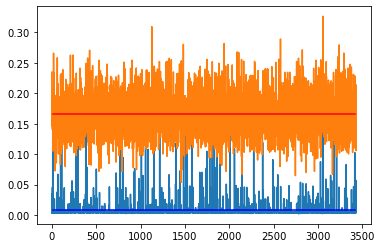

In [57]:
## Portscan mae byte
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Portscan IP header
AE_normal_mae = ip_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = ip_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Portscan TCP header
AE_normal_mae = tcp_header_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_header_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Portscan TCP Options
AE_normal_mae = tcp_options_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_options_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Portscan Segment
AE_normal_mae = tcp_segment_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_segment_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [58]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.16464563047592537
mae_byte_99_percentile 0.2505327822381002
mae_byte_95_percentile 0.22582397712978525
mae_byte_90_percentile 0.21090747110326075
ip_mae_avg 0.15597986781045314
tcp_header_mae_avg 0.14829412671366576
tcp_header_mae_avg 0.20356570243518507
tcp_segment_mae_avg 0.10477992996217354


In [59]:
recon_dos = model_VAE.predict(dos_attack)

In [60]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(dos_attack, recon_dos)

In [61]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.09])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.024])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.007])
print(count_90 / len(mae_byte_list))

0.9609252189535145
1.0
1.0


In [62]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('VAE_dos_MAE.csv', mae_byte_list, delimiter=',')

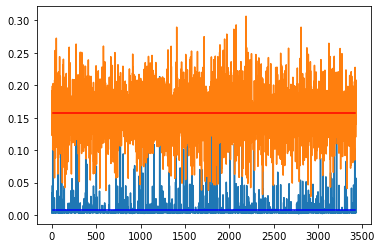

In [64]:
## DoS mae byte
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DoS IP header
AE_normal_mae = ip_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = ip_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DoS TCP header
AE_normal_mae = tcp_header_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_header_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DoS TCP Options
AE_normal_mae = tcp_options_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_options_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DoS Segment
AE_normal_mae = tcp_segment_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_segment_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [65]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.15758988786387307
mae_byte_99_percentile 0.2457287504219413
mae_byte_95_percentile 0.21552755863976428
mae_byte_90_percentile 0.20075783368638334
ip_mae_avg 0.15306760123391772
tcp_header_mae_avg 0.15060336977212468
tcp_header_mae_avg 0.2231759158368204
tcp_segment_mae_avg 0.15741878930646047


In [76]:
recon_ddos = model_VAE.predict(ddos_attack)

In [77]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(ddos_attack, recon_ddos)

In [78]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.09])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.024])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.007])
print(count_90 / len(mae_byte_list))

0.491970802919708
0.9939359910162829
1.0


In [79]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('VAE_ddos_MAE.csv', mae_byte_list, delimiter=',')

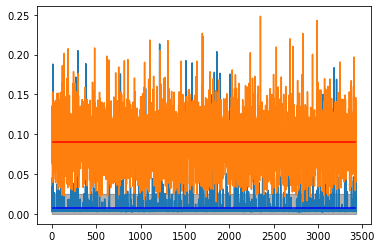

In [80]:
## DDoS
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DDoS IP header
AE_normal_mae = ip_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = ip_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DDoS TCP header
AE_normal_mae = tcp_header_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_header_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DDoS TCP Options
AE_normal_mae = tcp_options_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_options_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## DDoS Segment
AE_normal_mae = tcp_segment_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_segment_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [82]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.08969061263359908
mae_byte_99_percentile 0.17616757504213124
mae_byte_95_percentile 0.14353986183259448
mae_byte_90_percentile 0.13023306089567316
ip_mae_avg 0.08757767954301003
tcp_header_mae_avg 0.08984953375632178
tcp_header_mae_avg 0.028153031459350344
tcp_segment_mae_avg 0.15195662372949875


In [83]:
recon_infiltration = model_VAE.predict(infiltration_attack)

In [84]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(infiltration_attack, recon_infiltration)

In [85]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.09])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.024])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.007])
print(count_90 / len(mae_byte_list))

0.980235822571589
1.0
1.0


In [86]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('VAE_infiltration_MAE.csv', mae_byte_list, delimiter=',')

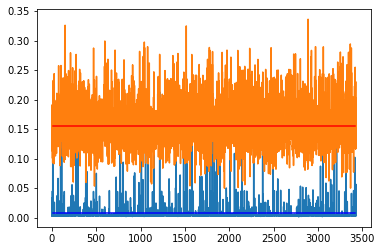

In [87]:
## Infiltration
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Infiltration IP header
AE_normal_mae = ip_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = ip_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Infiltration TCP header
AE_normal_mae = tcp_header_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_header_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Infiltration TCP Options
AE_normal_mae = tcp_options_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_options_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Infiltration Segment
AE_normal_mae = tcp_segment_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_segment_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [88]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.15548890442929023
mae_byte_99_percentile 0.2686405760276606
mae_byte_95_percentile 0.22968630554988523
mae_byte_90_percentile 0.2091400045610749
ip_mae_avg 0.15673919364991357
tcp_header_mae_avg 0.17641041250720887
tcp_header_mae_avg 0.15966849322311452
tcp_segment_mae_avg 0.14236719125442351


In [89]:
recon_web = model_VAE.predict(web_attack)

In [90]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(web_attack, recon_web)

In [95]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.093])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.024])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.007])
print(count_90 / len(mae_byte_list))

0.9950595104423984
1.0
1.0


In [92]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('VAE_web_MAE.csv', mae_byte_list, delimiter=',')

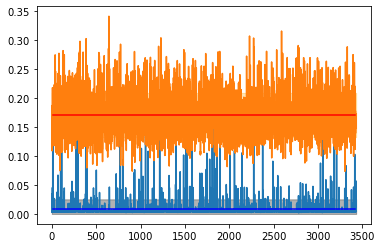

In [93]:
## Web attack
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Webattack IP header
AE_normal_mae = ip_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = ip_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Webattack TCP header
AE_normal_mae = tcp_header_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_header_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Webattack TCP Options
AE_normal_mae = tcp_options_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_options_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
## Webattack Segment
AE_normal_mae = tcp_segment_mae_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = tcp_segment_mae_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [94]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.17090152583764268
mae_byte_99_percentile 0.2746351392385788
mae_byte_95_percentile 0.23967615463070116
mae_byte_90_percentile 0.22335357992278648
ip_mae_avg 0.17922091102278984
tcp_header_mae_avg 0.15478206374306672
tcp_header_mae_avg 0.2840872739991597
tcp_segment_mae_avg 0.17871744116388394


In [ ]:
## Brute Force

In [96]:
recon_brute = model_VAE.predict(bruteforce_attack)

In [97]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(bruteforce_attack, recon_brute)

In [98]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.09])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.024])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.007])
print(count_90 / len(mae_byte_list))

0.9953958450308815
1.0
1.0


In [99]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('VAE_brute_MAE.csv', mae_byte_list, delimiter=',')

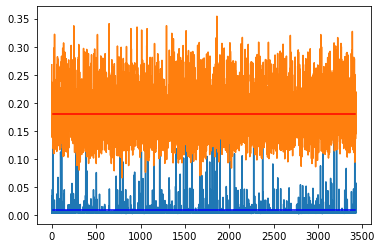

In [100]:
## Brute Force
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
#                  max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
# plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
#                  np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
### CICIDS 2018

In [ ]:
df_2018['Label'].value_counts()

In [ ]:
infiltration_attack = df_2018[df_2018['Label'] == 'Infiltration'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(infiltration_attack.shape)
# portscan_attack = df_2018[df_2018['Label'] == 'Port Scan'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
# print(portscan_attack.shape)
ddos_attack = df_2018[df_2018['Label'] == 'ddos'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(ddos_attack.shape)
bruteforce_attack = df_2018[df_2018['Label'] == 'Brute Force'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(bruteforce_attack.shape)
dos_attack = df_2018[df_2018['Label'] == 'DoS'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(dos_attack.shape)
web_attack = df_2018[df_2018['Label'] == 'Web Attack'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(web_attack.shape)

In [ ]:
benign_data_2018 = df_2018[df_2018['Label'] == 'Benign'].drop(['Label_binary','Label'], axis=1).iloc[:,0:200]
print(benign_data_2018.shape)

In [ ]:
recon_x_test_normal = model_VAE.predict(benign_data_2018)

In [ ]:
mae_byte_list_normal, ip_mae_list_normal, tcp_header_mae_list_normal, tcp_options_mae_list_normal, tcp_segment_mae_list_normal = recon_metrices(benign_data_2018, recon_x_test_normal)

In [ ]:
mae_byte_avg = sum(mae_byte_list_normal) / np.count_nonzero(mae_byte_list_normal)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list_normal, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list_normal, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list_normal, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list_normal) / np.count_nonzero(ip_mae_list_normal)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list_normal) / np.count_nonzero(tcp_header_mae_list_normal)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list_normal) / np.count_nonzero(tcp_options_mae_list_normal)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list_normal) / np.count_nonzero(tcp_segment_mae_list_normal)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

In [ ]:
## dos

In [ ]:
recon_dos = model_VAE.predict(dos_attack)

In [ ]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(dos_attack, recon_dos)

In [ ]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.093])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.023])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.007])
print(count_90 / len(mae_byte_list))

In [ ]:
## Dos
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

In [ ]:
##DDOS

In [ ]:
recon_ddos = model_VAE.predict(ddos_attack)

In [ ]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(ddos_attack, recon_ddos)

In [ ]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.093])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.023])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.007])
print(count_90 / len(mae_byte_list))

In [ ]:
## DDos
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

In [ ]:
## Infiltration

In [ ]:
recon_infiltration = model_VAE.predict(infiltration_attack)

In [ ]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(infiltration_attack, recon_infiltration)

In [ ]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.093])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.023])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.007])
print(count_90 / len(mae_byte_list))

In [ ]:
## Infiltration
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

In [ ]:
## Web attack

In [ ]:
recon_web = model_VAE.predict(web_attack)

In [ ]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(web_attack, recon_web)

In [ ]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.093])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.023])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.007])
print(count_90 / len(mae_byte_list))

In [ ]:
## Web attack
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

In [ ]:
## Brute Force

In [ ]:
recon_brute = model_VAE.predict(bruteforce_attack)

In [ ]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(bruteforce_attack, recon_brute)

In [ ]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.093])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.023])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.007])
print(count_90 / len(mae_byte_list))

In [ ]:
## Brute Force
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [ ]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

In [ ]:
## Adversarial Examples

In [101]:
p1 = pd.read_csv('adv_examples_portscan_DT.csv')
p2 = pd.read_csv('adv_examples_portscan_RF.csv')
p3 = pd.read_csv('adv_examples_portscan_SVC.csv')
p4 = pd.read_csv('adv_examples_portscan_MLP.csv')

In [102]:
port_adv = pd.concat([p1,p2,p3,p4]).sample(frac = 1).iloc[:,0:200]

In [103]:
port_adv

,ip_header_byte_2,ip_header_byte_3,ip_header_byte_4,ip_header_byte_5,ip_header_byte_6,ip_header_byte_7,ip_header_byte_8,ip_header_byte_10,ip_header_byte_11,tcp_header_byte_4,...,tcp_segment_data_byte_125,tcp_segment_data_byte_126,tcp_segment_data_byte_127,tcp_segment_data_byte_128,tcp_segment_data_byte_129,tcp_segment_data_byte_130,tcp_segment_data_byte_131,tcp_segment_data_byte_132,tcp_segment_data_byte_133,tcp_segment_data_byte_134
1136,0.0,0.290196,0.784314,0.360784,0.00000,0.0,0.250980,0.231373,0.400000,0.078431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1235,0.0,0.431373,0.796078,0.054902,0.25098,0.0,0.258824,0.964706,0.560784,0.956863,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,0.0,0.329412,0.466667,0.858824,0.12549,0.0,0.254902,0.415686,0.866667,0.921569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902,0.0,0.352941,0.698039,0.133333,0.25098,0.0,0.250980,0.066667,0.564706,0.952941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
625,0.0,0.290196,0.709804,0.258824,0.12549,0.0,0.250980,0.180392,0.501961,0.215686,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,0.0,0.470588,0.898039,0.937255,0.25098,0.0,0.250980,0.866667,0.643137,0.439216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1857,0.0,0.435294,1.000000,0.266667,0.12549,0.0,0.270588,0.874510,0.345098,0.733333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1463,0.0,0.290196,0.219608,0.831373,0.00000,0.0,0.254902,0.788235,0.933333,0.239216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,0.0,0.172549,0.607843,0.725490,0.00000,0.0,0.254902,0.403922,0.152941,0.121569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
recon_adv_port = model_VAE.predict(port_adv)

In [105]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(port_adv, recon_adv_port)

In [106]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.09])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.024])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.007])
print(count_90 / len(mae_byte_list))

0.9959401167216443
1.0
1.0


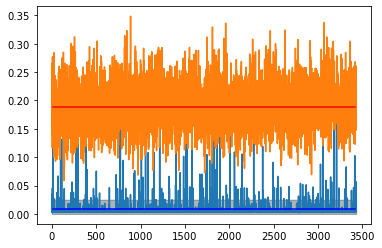

In [107]:
## Adv portscan
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [108]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.18943183691506438
mae_byte_99_percentile 0.2919022317205351
mae_byte_95_percentile 0.25828358055444645
mae_byte_90_percentile 0.2412375542736628
ip_mae_avg 0.19072418978585293
tcp_header_mae_avg 0.16444943169117776
tcp_header_mae_avg 0.2439540606031664
tcp_segment_mae_avg 0.2283469492949163


In [109]:
d1 = pd.read_csv('adv_examples_dos_DT.csv')
d2 = pd.read_csv('adv_examples_dos_RF.csv')
d3 = pd.read_csv('adv_examples_dos_SVC.csv')
d4 = pd.read_csv('adv_examples_dos_MLP.csv')

In [110]:
dos_adv = pd.concat([d1,d2,d3,d4]).sample(frac = 1).iloc[:,0:200]

In [111]:
recon_adv_dos = model_VAE.predict(dos_adv)

In [112]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(dos_adv, recon_adv_dos)

In [113]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.09])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.024])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.007])
print(count_90 / len(mae_byte_list))

0.9769891140808921
1.0
1.0


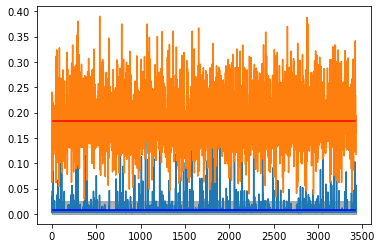

In [114]:
## Adv dos
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [115]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.18400338539232633
mae_byte_99_percentile 0.3211981319496835
mae_byte_95_percentile 0.2804674658426098
mae_byte_90_percentile 0.2555839001137101
ip_mae_avg 0.18276751452239332
tcp_header_mae_avg 0.17224885977408727
tcp_header_mae_avg 0.26280150548643816
tcp_segment_mae_avg 0.17370410234841646


In [116]:
dd1 = pd.read_csv('adv_examples_ddos_DT.csv')
dd2 = pd.read_csv('adv_examples_ddos_RF.csv')
dd3 = pd.read_csv('adv_examples_ddos_SVC.csv')
dd4 = pd.read_csv('adv_examples_ddos_MLP.csv')

In [117]:
ddos_adv = pd.concat([dd1,dd2,dd3,dd4]).sample(frac = 1).iloc[:,0:200]

In [118]:
recon_adv_ddos = model_VAE.predict(ddos_adv)

In [119]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(ddos_adv, recon_adv_ddos)

In [120]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.09])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.024])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.007])
print(count_90 / len(mae_byte_list))

0.9901410752219619
1.0
1.0


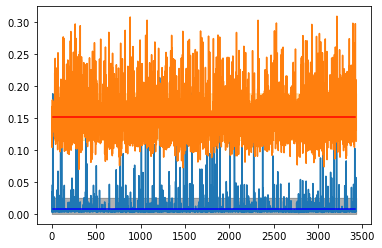

In [121]:
## Adv ddos
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [122]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.15266125221415208
mae_byte_99_percentile 0.2690517079741638
mae_byte_95_percentile 0.2283713322985802
mae_byte_90_percentile 0.2013563268043777
ip_mae_avg 0.136219003263603
tcp_header_mae_avg 0.14421218541446504
tcp_header_mae_avg 0.10767185606177035
tcp_segment_mae_avg 0.2192226552748291


In [123]:
inf1 = pd.read_csv('adv_examples_infiltration_DT.csv')
inf2 = pd.read_csv('adv_examples_infiltration_RF.csv')
inf3 = pd.read_csv('adv_examples_infiltration_SVC.csv')
inf4 = pd.read_csv('adv_examples_infiltration_MLP.csv')

In [124]:
inf_adv = pd.concat([inf1,inf2,inf3,inf4]).sample(frac = 1).iloc[:,0:200]

In [125]:
recon_adv_inf = model_VAE.predict(inf_adv)

In [126]:
mae_byte_list, ip_mae_list, tcp_header_mae_list, tcp_options_mae_list, tcp_segment_mae_list = recon_metrices(inf_adv, recon_adv_inf)

In [127]:
## Classification
count_99 = len([i for i in mae_byte_list if i > 0.09])
print(count_99 / len(mae_byte_list))
count_95 = len([i for i in mae_byte_list if i > 0.024])
print(count_95 / len(mae_byte_list))
count_90 = len([i for i in mae_byte_list if i > 0.007])
print(count_90 / len(mae_byte_list))

0.9736162890737023
1.0
1.0


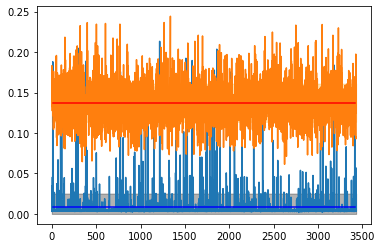

In [128]:
## Adv infiltration
AE_normal_mae = mae_byte_list_normal[0:3432]
plt.plot(AE_normal_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_normal_mae).mean() + np.array(AE_normal_mae).std(),\
                 max(np.array(AE_normal_mae).mean() - np.array(AE_normal_mae).std(),0),color = "black",alpha = 0.3)
plt.axhline(y = np.array(AE_normal_mae).mean(), color = 'blue', linestyle = '-',xmin = 0.05, xmax = 0.95)

AE_infiltration_attack_mae = mae_byte_list[0:3432]
plt.plot(AE_infiltration_attack_mae)
plt.fill_between([i for i in range(3432)],np.array(AE_infiltration_attack_mae).mean() - np.array(AE_infiltration_attack_mae).std(),\
                 np.array(AE_infiltration_attack_mae).mean() + np.array(AE_infiltration_attack_mae).std(),color = "orange",alpha = 0.3)
plt.axhline(y = np.array(AE_infiltration_attack_mae).mean(), color = 'r', linestyle = '-',xmin = 0.05, xmax = 0.95)

In [129]:
mae_byte_avg = sum(mae_byte_list) / np.count_nonzero(mae_byte_list)
print('mae_byte_avg', mae_byte_avg)
mae_byte_per_95 = np.percentile(mae_byte_list, 99)
print('mae_byte_99_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 95)
print('mae_byte_95_percentile', mae_byte_per_95)
mae_byte_per_95 = np.percentile(mae_byte_list, 90)
print('mae_byte_90_percentile', mae_byte_per_95)
ip_mae_avg = sum(ip_mae_list) / np.count_nonzero(ip_mae_list)
print('ip_mae_avg', ip_mae_avg)
tcp_header_mae_avg = sum(tcp_header_mae_list) / np.count_nonzero(tcp_header_mae_list)
print('tcp_header_mae_avg', tcp_header_mae_avg)
tcp_options_mae_avg = sum(tcp_options_mae_list) / np.count_nonzero(tcp_options_mae_list)
print('tcp_header_mae_avg', tcp_options_mae_avg)
tcp_segment_mae_avg = sum(tcp_segment_mae_list) / np.count_nonzero(tcp_segment_mae_list)
print('tcp_segment_mae_avg', tcp_segment_mae_avg)

mae_byte_avg 0.13749002258208562
mae_byte_99_percentile 0.20582539442291964
mae_byte_95_percentile 0.17721701007011068
mae_byte_90_percentile 0.16567097645712436
ip_mae_avg 0.14055303478658032
tcp_header_mae_avg 0.16325107199260663
tcp_header_mae_avg 0.08985686956550375
tcp_segment_mae_avg 0.1332863388804746
